In [1]:
import torch

In [6]:
lut = torch.linspace(0, 4, 3+1)

In [10]:
lut

tensor([0.0000, 1.3333, 2.6667, 4.0000])

In [48]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [121]:
doe_size = [50, 50]
doe_level = 11
height_constraint_min = 0.0
height_constraint_max = 4.0
tau = 500

lut = torch.linspace(height_constraint_min, height_constraint_max, doe_level+1)
lut = lut[:-1]
print(lut)
height_map = height_constraint_max * torch.rand(doe_size[0], doe_size[1])

tensor([0.0000, 0.3636, 0.7273, 1.0909, 1.4545, 1.8182, 2.1818, 2.5455, 2.9091,
        3.2727, 3.6364])


In [122]:
# PSQ method implementation
delta = (height_constraint_max - height_constraint_min) / (doe_level - 1)
print(delta)
height_map_clamped = torch.clamp(height_map, height_constraint_min, height_constraint_max)

x_normalized = (height_map_clamped - height_constraint_min) / delta - 0.5
levels_range = torch.arange(holo_level - 1, device=height_map.device).unsqueeze(0).unsqueeze(2)

height_map_quantized = height_constraint_min + delta * torch.sum(
    torch.sigmoid(tau * (x_normalized.unsqueeze(1) - levels_range)),
    dim=1
)

0.4


In [123]:
height_map_quantized.unique()

tensor([0.0000e+00, 5.7361e-39, 1.1133e-38, 8.2164e-38, 6.6384e-35, 2.8811e-31,
        1.9231e-29, 5.3066e-28, 1.4753e-27, 3.0310e-27, 7.8405e-27, 2.7437e-26,
        4.3867e-24, 1.8832e-22, 3.1383e-20, 1.3682e-17, 4.9166e-17, 1.5032e-16,
        3.5117e-16, 4.4585e-16, 7.3426e-16, 2.4710e-14, 1.0128e-11, 2.3880e-11,
        2.7855e-09, 3.8728e-08, 6.0413e-08, 6.4158e-07, 1.6282e-06, 4.9768e-06,
        3.7069e-05, 4.9923e-05, 6.9722e-05, 7.6242e-04, 2.4960e-03, 2.1338e-02,
        1.3774e-01, 3.4687e-01, 3.9050e-01, 3.9543e-01, 3.9997e-01, 4.0000e-01,
        4.0000e-01, 4.0000e-01, 4.0000e-01, 4.0006e-01, 4.0013e-01, 4.0024e-01,
        4.0092e-01, 4.0199e-01, 4.6475e-01, 4.9752e-01, 7.4388e-01, 7.8112e-01,
        7.9964e-01, 7.9982e-01, 7.9992e-01, 7.9995e-01, 7.9998e-01, 8.0000e-01,
        8.0000e-01, 8.0000e-01, 8.0000e-01, 8.0004e-01, 8.0023e-01, 8.0140e-01,
        8.0358e-01, 8.5475e-01, 8.6622e-01, 9.4805e-01, 1.0742e+00, 1.1111e+00,
        1.1954e+00, 1.1997e+00, 1.1998e+

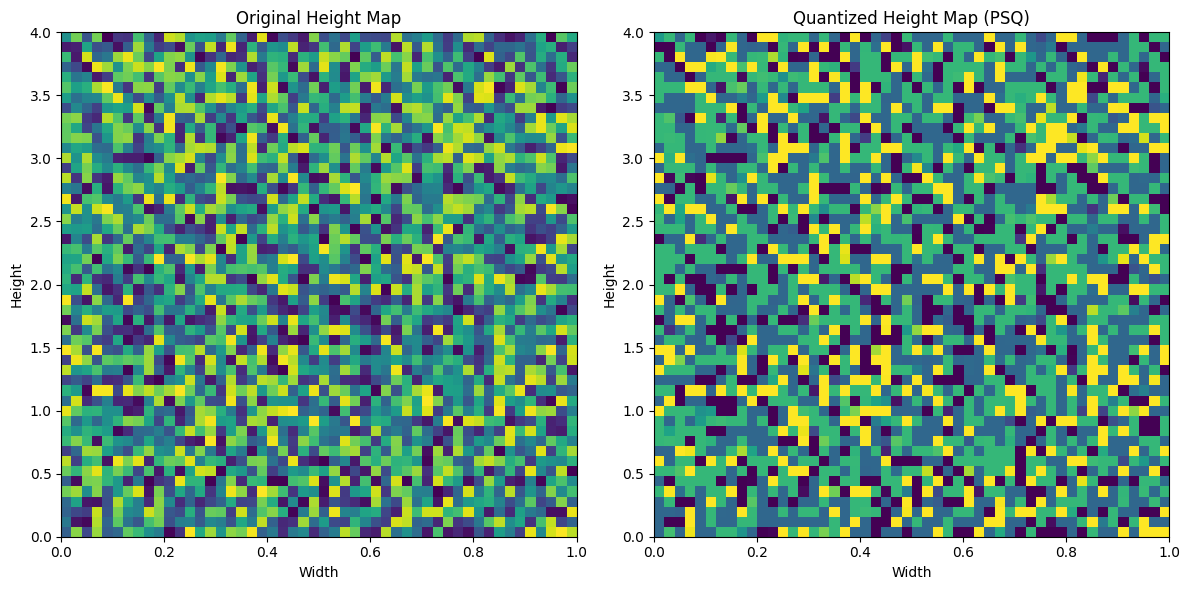

In [87]:
# Convert tensors to numpy for plotting
height_map_np = height_map.numpy()
height_map_quantized_np = height_map_quantized.numpy()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original height map
axs[0].imshow(height_map_np, extent=[0, 1, height_constraint_min, height_constraint_max], aspect='auto', cmap='viridis')
axs[0].set_title('Original Height Map')
axs[0].set_xlabel('Width')
axs[0].set_ylabel('Height')

# Quantized height map
axs[1].imshow(height_map_quantized_np, extent=[0, 1, height_constraint_min, height_constraint_max], aspect='auto', cmap='viridis')
axs[1].set_title('Quantized Height Map (PSQ)')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')

plt.tight_layout()
plt.show()

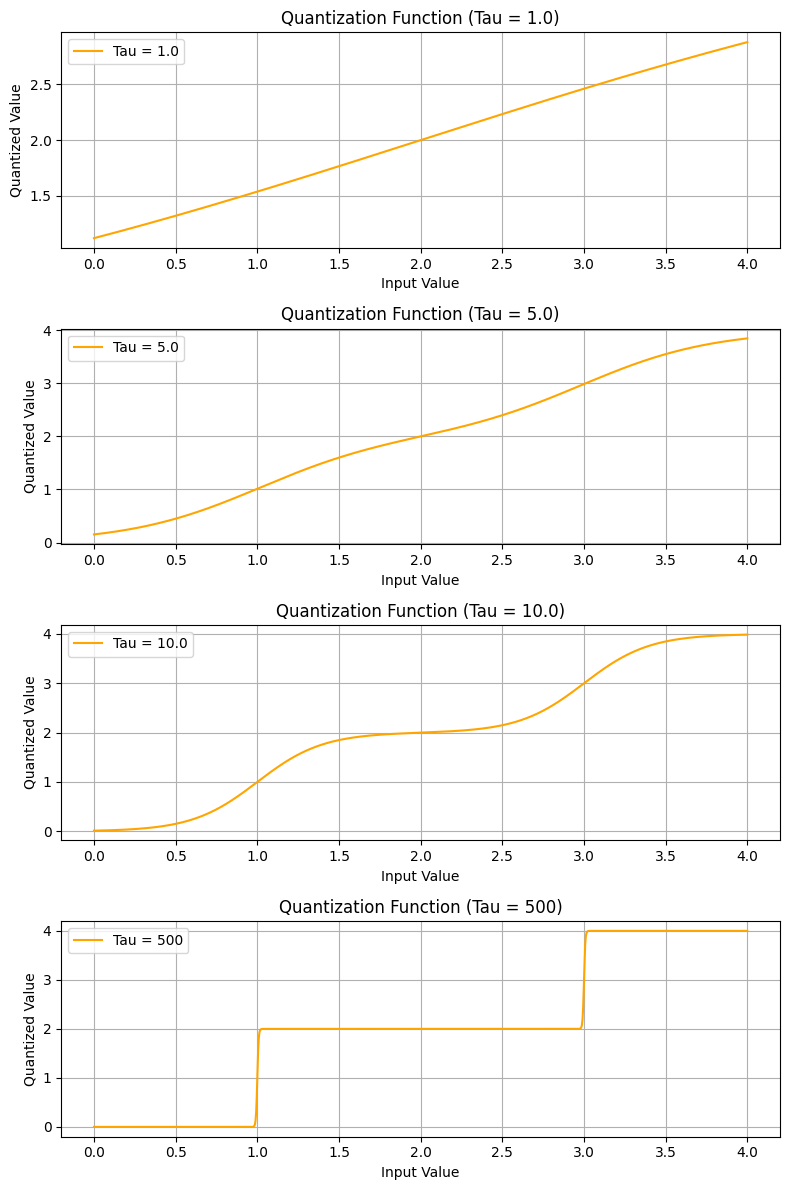

In [71]:
import torch
import matplotlib.pyplot as plt

class ProgressiveSigmoidQuantizer:
    def __init__(self, holo_level, height_constraint_min, height_constraint_max):
        self.holo_level = holo_level
        self.height_constraint_min = height_constraint_min
        self.height_constraint_max = height_constraint_max
        self.delta = (height_constraint_max - height_constraint_min) / (holo_level - 1)
        
    def quantize(self, x, tau):
        x_normalized = (x - self.height_constraint_min) / self.delta - 0.5
        levels_range = torch.arange(self.holo_level - 1).unsqueeze(0)
        quantized_values = self.height_constraint_min + self.delta * torch.sum(
            torch.sigmoid(tau * (x_normalized.unsqueeze(0) - levels_range.T)),
            dim=0
        )
        return quantized_values

# Parameters
holo_level = 3
height_constraint_min = 0.0
height_constraint_max = 4.0
tau_values = [1.0, 5.0, 10.0, 500]  # Different tau values to show the effect of tau on quantization

# One-dimensional data
x = torch.linspace(height_constraint_min, height_constraint_max, steps=1000)

# Create a PSQ object
psq = ProgressiveSigmoidQuantizer(holo_level, height_constraint_min, height_constraint_max)

# Plotting the quantization functions for different tau values
fig, axs = plt.subplots(len(tau_values), 1, figsize=(8, 12))

for i, tau in enumerate(tau_values):
    y = psq.quantize(x, tau)
    axs[i].plot(x.numpy(), y.numpy(), label=f'Tau = {tau}', color='orange')
    axs[i].set_title(f'Quantization Function (Tau = {tau})')
    axs[i].set_xlabel('Input Value')
    axs[i].set_ylabel('Quantized Value')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

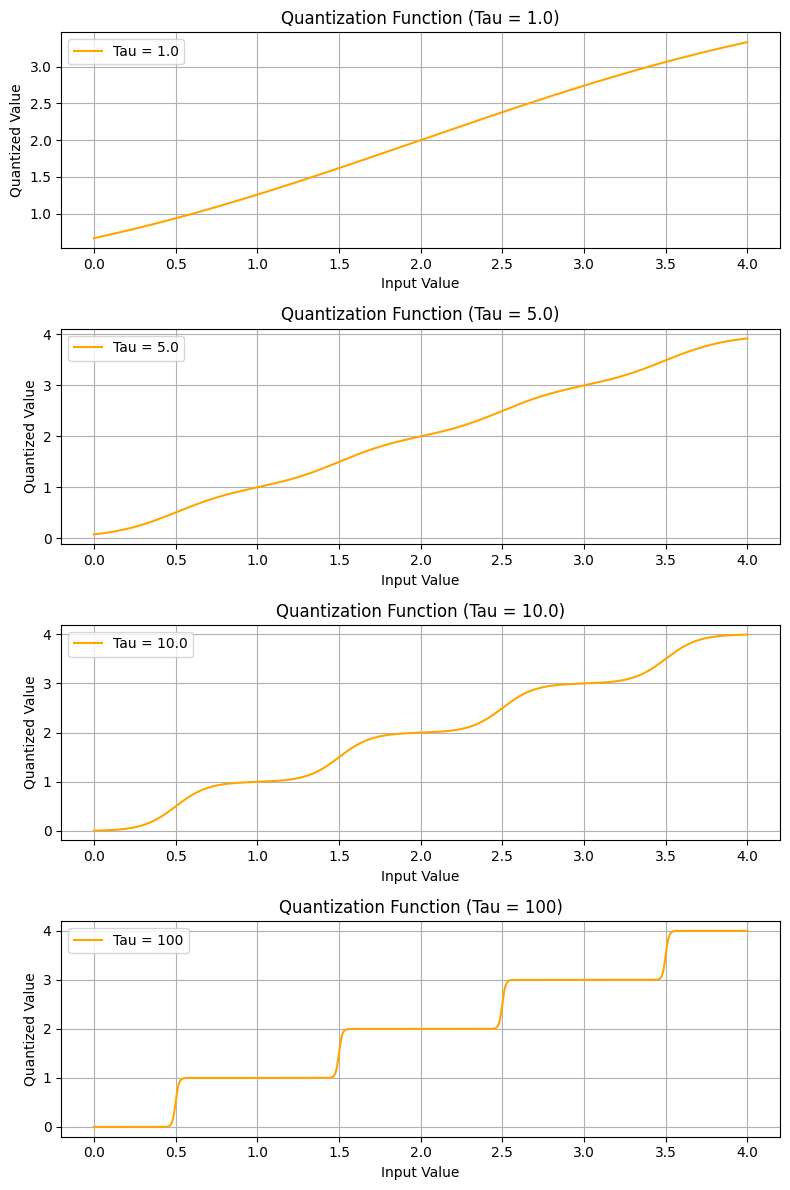

In [76]:
class ProgressiveSigmoidQuantizer:
    def __init__(self, holo_level, height_constraint_min, height_constraint_max):
        self.holo_level = holo_level
        self.height_constraint_min = height_constraint_min
        self.height_constraint_max = height_constraint_max
        self.delta = (height_constraint_max - height_constraint_min) / (holo_level - 1)
        
    def quantize(self, x, tau):
        levels_range = torch.arange(self.holo_level - 1)
        shifted_x = x - self.height_constraint_min - self.delta / 2
        sigmoids = torch.sigmoid(tau * (shifted_x.unsqueeze(0) - levels_range.unsqueeze(1) * self.delta))
        quantized_values = self.height_constraint_min + self.delta * torch.sum(sigmoids, dim=0)
        return quantized_values

# Parameters
holo_level = 5
height_constraint_min = 0.0
height_constraint_max = 4.0
tau_values = [1.0, 5.0, 10.0, 100]  # Different tau values to show the effect of tau on quantization

# One-dimensional data
x = torch.linspace(height_constraint_min, height_constraint_max, steps=1000)

# Create a PSQ object
psq = ProgressiveSigmoidQuantizer(holo_level, height_constraint_min, height_constraint_max)

# Plotting the quantization functions for different tau values
fig, axs = plt.subplots(len(tau_values), 1, figsize=(8, 12))

for i, tau in enumerate(tau_values):
    y = psq.quantize(x, tau)
    axs[i].plot(x.numpy(), y.numpy(), label=f'Tau = {tau}', color='orange')
    axs[i].set_title(f'Quantization Function (Tau = {tau})')
    axs[i].set_xlabel('Input Value')
    axs[i].set_ylabel('Quantized Value')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [97]:
import torch
import matplotlib.pyplot as plt

class ProgressiveSigmoidQuantizer:
    def __init__(self, holo_level, height_constraint_min, height_constraint_max):
        self.holo_level = holo_level
        self.height_constraint_min = height_constraint_min
        self.height_constraint_max = height_constraint_max
        self.delta = (height_constraint_max - height_constraint_min) / (holo_level - 1)
        
    def quantize(self, x, tau):
        levels_range = torch.arange(self.holo_level - 1)
        shifted_x = x - self.height_constraint_min - self.delta / 2
        sigmoids = torch.sigmoid(tau * (shifted_x.unsqueeze(0) - levels_range.unsqueeze(1) * self.delta))
        quantized_values = self.height_constraint_min + self.delta * torch.sum(sigmoids, dim=0)
        return quantized_values

# Parameters
holo_level = 6
height_constraint_min = 0.0
height_constraint_max = 4.0
tau = 5.0  # A typical value for tau

# Create 2D height map data
height_map = torch.linspace(height_constraint_min, height_constraint_max, steps=100).unsqueeze(0).repeat(100, 1)
height_map = height_map + height_map.T

# Create a PSQ object
psq = ProgressiveSigmoidQuantizer(holo_level, height_constraint_min, height_constraint_max)

# Quantize the 2D height map
quantized_height_map = psq.quantize(height_map, tau)

# Convert tensors to numpy for plotting
height_map_np = height_map.numpy()
quantized_height_map_np = quantized_height_map.numpy()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original height map
axs[0].imshow(height_map_np, extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
axs[0].set_title('Original 2D Height Map')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Quantized height map
axs[1].imshow(quantized_height_map_np, extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
axs[1].set_title('Quantized 2D Height Map (PSQ)')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

RuntimeError: The size of tensor a (100) must match the size of tensor b (5) at non-singleton dimension 1

In [156]:
doe_size = [5, 5]
doe_level = 4
height_constraint_min = 0.0
height_constraint_max = 4.0
tau = 500

lut = torch.linspace(height_constraint_min, height_constraint_max, doe_level+1)
lut = lut[:-1]
print(lut)
height_map = height_constraint_max * torch.rand(doe_size[0], doe_size[1], requires_grad=True)

tensor([0., 1., 2., 3.])


In [157]:
idx = torch.argmin(torch.abs(height_map.unsqueeze(-1) - lut), dim=-1)

In [158]:
quantized = lut[idx]

In [159]:
quantized

tensor([[2., 3., 1., 3., 3.],
        [3., 1., 1., 1., 3.],
        [1., 3., 3., 3., 0.],
        [2., 1., 1., 2., 3.],
        [3., 1., 2., 2., 2.]])

In [160]:
height_map

tensor([[2.4894, 3.1928, 1.2200, 3.8393, 2.6057],
        [2.8208, 0.5521, 0.5956, 1.2667, 3.8382],
        [1.0226, 2.9731, 3.2031, 3.4030, 0.1260],
        [2.3981, 0.9377, 0.5316, 1.5548, 3.5477],
        [3.8952, 0.6490, 1.7571, 1.5310, 1.5600]], grad_fn=<MulBackward0>)

In [161]:
class STEQuantizationFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, lut):
        # Quantize the input based on the look-up table
        idx = torch.argmin(torch.abs(input.unsqueeze(-1) - lut), dim=-1)
        quantized = lut[idx]
        ctx.save_for_backward(input, lut)
        return quantized

    @staticmethod
    def backward(ctx, grad_output):
        input, lut = ctx.saved_tensors
        grad_input = grad_output.clone()
        # Straight-Through Estimator: Pass gradients through as if the quantization is an identity function
        return grad_input, None

ste = STEQuantizationFunction.apply

In [163]:
# Forward pass
input = torch.tensor(height_map, requires_grad=True)
quantized = ste(input, lut)
print("Quantized Output:", quantized)

# Backward pass
quantized.sum().backward()
print("Gradient wrt Input:", input.grad)

Quantized Output: tensor([[2., 3., 1., 3., 3.],
        [3., 1., 1., 1., 3.],
        [1., 3., 3., 3., 0.],
        [2., 1., 1., 2., 3.],
        [3., 1., 2., 2., 2.]], grad_fn=<STEQuantizationFunctionBackward>)
Gradient wrt Input: tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


/tmp/shaosiha/21962258/ipykernel_1569922/418180597.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(height_map, requires_grad=True)


In [141]:
a.grad

In [147]:
ste = STEQuantizationFunction.apply

# Example usage
input = torch.tensor([0.1, 0.4, 0.7, 1.2], requires_grad=True)
lut = torch.tensor([0.0, 0.5, 1.0])

# Forward pass
quantized = ste(input, lut)
print("Quantized Output:", quantized)

# Backward pass
quantized.sum().backward()
print("Gradient wrt Input:", input.grad)

Quantized Output: tensor([0.0000, 0.5000, 0.5000, 1.0000],
       grad_fn=<STEQuantizationFunctionBackward>)
Gradient wrt Input: tensor([1., 1., 1., 1.])


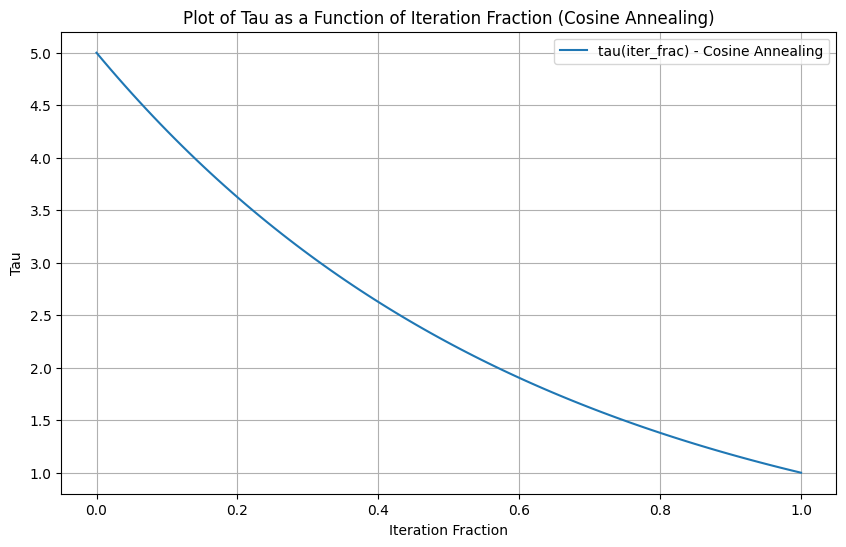

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Redefine the tau_iter function based on cosine annealing
def tau_iter(iter_frac, tau_min=1, tau_max=5.5):
    tau = tau_min + 0.5 * (tau_max - tau_min) * (1 + math.cos(iter_frac * math.pi *3))
    return tau

def tau_iter(iter_frac, tau_min=1, tau_max=5, r=None):
            if r is None:
                r = math.log(tau_max / tau_min)
            tau = max(tau_min, tau_max * math.exp(-r * iter_frac))
            return tau

# Generate values for iter_frac
iter_fracs = np.linspace(0, 1, 100)

# Calculate corresponding tau values using the new cosine annealing formula
tau_values_cosine = [tau_iter(iter_frac) for iter_frac in iter_fracs]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(iter_fracs, tau_values_cosine, label='tau(iter_frac) - Cosine Annealing')
plt.xlabel('Iteration Fraction')
plt.ylabel('Tau')
plt.title('Plot of Tau as a Function of Iteration Fraction (Cosine Annealing)')
plt.legend()
plt.grid(True)
plt.show()

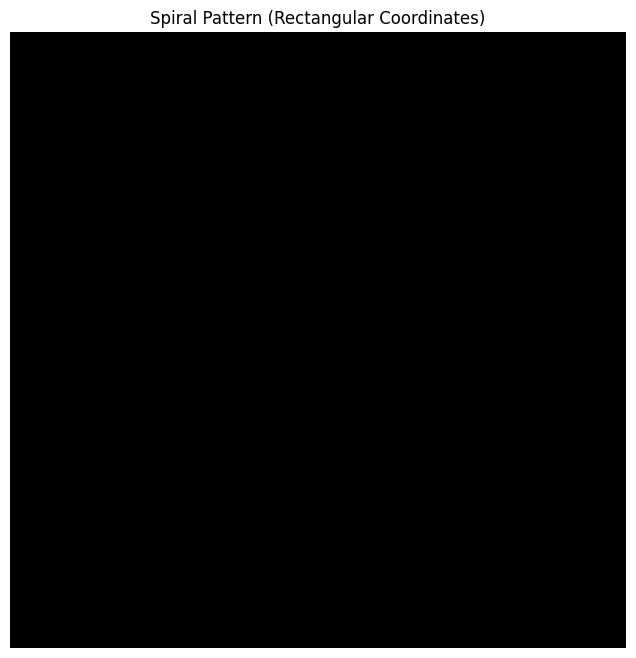

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def spiral_rect(n, m, s, l=4e-3, w=2e-3, k=12, t=2500):
    x = (torch.arange(n) - n // 2) * s
    y = (torch.arange(m) - m // 2) * s
    xv, yv = torch.meshgrid(x, y)
    r = (xv ** 2 + yv ** 2) ** 0.5
    theta = torch.atan2(yv, xv)
    out = (r * t - theta) % (np.pi / k)
    out = out > (np.pi / k / 2)
    out = out * (xv ** 2 + yv ** 2 <= (l / 2) ** 2)
    return out.float()

# Parameters for the spiral
n, m, s = 100, 100, 1

# Generate the spiral using rectangular coordinates
spiral_pattern_rect = spiral_rect(n, m, s).numpy()

# Plot the spiral
plt.figure(figsize=(8, 8))
plt.imshow(spiral_pattern_rect, cmap='gray')
plt.title('Spiral Pattern (Rectangular Coordinates)')
plt.axis('off')
plt.show()

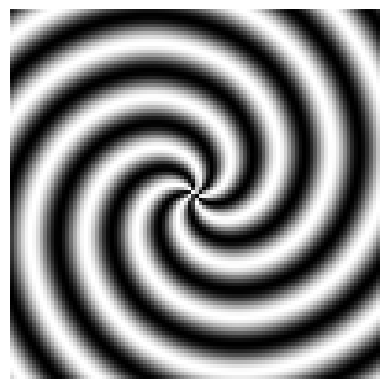

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Set the resolution
resolution = 100

# Create an array of complex numbers
x = np.linspace(-10, 10, resolution)
y = np.linspace(-10, 10, resolution)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Compute the angle and radius of each point
angle = np.angle(Z)
radius = np.abs(Z)

# Generate the spiral pattern
spiral_pattern = np.sin(radius*2 + angle * 5)

# Plot the image
plt.imshow(spiral_pattern, cmap='gray', extent=(-10, 10, -10, 10))
plt.axis('off')  # Hide axes
plt.show()

In [21]:
spiral_data.shape

torch.Size([2, 100, 100])

In [24]:
spiral_data[1,:,:].shape

torch.Size([100, 100])

In [10]:
def _copy_quad_to_full(quad_map):
    height_map_half_left = torch.cat([torch.flip(quad_map, dims=[0]), quad_map], dim=0)
    height_map_full = torch.cat([torch.flip(height_map_half_left, dims=[1]), height_map_half_left], dim=1)
    return height_map_full

In [77]:
import torch
height = int(100 * torch.sqrt(torch.tensor(2)))
params = torch.rand(int(height / 2))

height_map_1d = 2* torch.sigmoid(torch.clamp(params, min=-8.0, max=8.0))

print(height_map_1d)

radius = int(height / 2)

diameter = radius * 2

x, y = torch.meshgrid(torch.arange(0, diameter // 2),
                      torch.arange(0, diameter // 2), indexing='ij')

radius_distance = torch.sqrt(x ** 2 + y ** 2)

height_map_quad = torch.where((radius_distance < 1.0) & (radius_distance >= 0.0),
                                      height_map_1d[0], 0)

for r in range(1, radius - 1):
    height_map_quad += torch.where((radius_distance < float(r + 1)) & (radius_distance >= float(r)),
                                    height_map_1d[r], 0)

height_map_full = _copy_quad_to_full(height_map_quad)

height_map = height_map_full.reshape(diameter, diameter)

# Crop the height map from the center with dimensions [height, height]
center_x, center_y = diameter // 2, diameter // 2
start_x, start_y = center_x - 100 // 2, center_y - 100 // 2
cropped_height_map_center = height_map[start_x:start_x + 100, start_y:start_y + 100]

#preprocessed_height_map = height_map[None, None, :, :]
#preprocessed_height_map = torch.nn.functional.interpolate(preprocessed_height_map, size=[200, 200], mode='nearest')
#_height_map_ = torch.squeeze(preprocessed_height_map, (0, 1))

tensor([1.4520, 1.4087, 1.1475, 1.3039, 1.4155, 1.2300, 1.0205, 1.2066, 1.1371,
        1.2069, 1.1942, 1.1644, 1.3268, 1.4268, 1.0947, 1.3490, 1.1042, 1.4236,
        1.0920, 1.2202, 1.4506, 1.4417, 1.4080, 1.2965, 1.1460, 1.0576, 1.3807,
        1.2374, 1.4617, 1.2250, 1.1114, 1.2610, 1.3543, 1.2399, 1.4313, 1.4484,
        1.3544, 1.2934, 1.0451, 1.1689, 1.2740, 1.0702, 1.1584, 1.4023, 1.2268,
        1.3344, 1.0944, 1.3169, 1.0284, 1.3537, 1.2622, 1.3549, 1.1610, 1.2193,
        1.4099, 1.3183, 1.0249, 1.1895, 1.1987, 1.3303, 1.3882, 1.2490, 1.3050,
        1.1627, 1.4473, 1.2312, 1.0337, 1.1830, 1.2803, 1.0119])


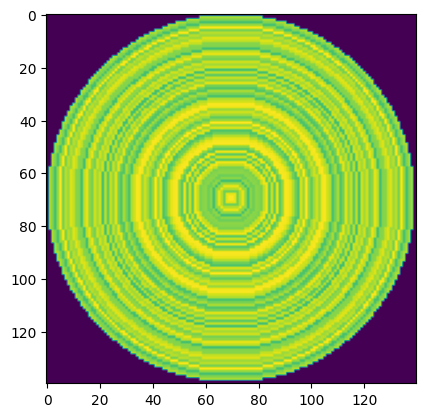

In [78]:
import matplotlib.pyplot as plt

plt.imshow(height_map)

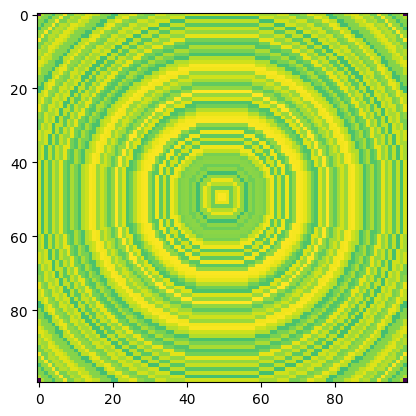

In [79]:
plt.imshow(cropped_height_map_center)

In [80]:
cropped_height_map_center.shape

torch.Size([100, 100])

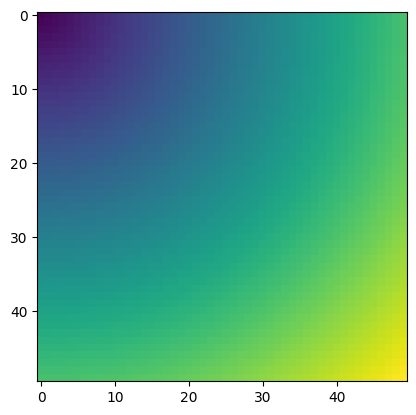

In [65]:
plt.imshow(radius_distance)